<font color="red" size=7>
    
Coronavirus COVID-19
-> México    
<font color="red" size=4>
    
(Año 2020)

#### Jesús Octavio García Flores
#### (j.octavio.ibs@gmail.com)

_____________________________________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

<font color='blue' size=4>
    
Full data set

In [2]:
source_full_data = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"
data1 = pd.read_csv(source_full_data)
full_data = pd.DataFrame(data1)
#full_data.head()

<font color="blue" size=4>
    
Total cases set

In [3]:
source_total_cases = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
data2 = pd.read_csv(source_total_cases)
total_cases = pd.DataFrame(data2)
#total_cases.head()
total_cases.describe()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
count,89.000000,79.000000,20.000000,84.000000,15.000000,7.000000,2.0,9.000000,22.000000,80.000000,...,89.000000,89.000000,5.000000,14.000000,13.000000,14.000000,14.000000,85.000000,10.000000,8.000000
mean,85659.393258,6.784810,68.200000,24.714286,94.400000,2.428571,2.0,2.777778,168.363636,29.725000,...,907.191011,5554.258427,17.400000,122.357143,41.846154,1.571429,55.142857,25.176471,5.900000,2.500000
std,121272.360327,17.499942,54.281527,64.662902,85.656123,0.786796,0.0,2.538591,204.975387,78.475663,...,2559.093545,17943.202436,0.894427,81.595255,29.296889,1.452546,37.397773,38.741566,5.685264,1.195229
min,27.000000,0.000000,2.000000,0.000000,1.000000,2.000000,2.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,17.000000,6.000000,6.000000,1.000000,10.000000,0.000000,2.000000,1.000000
25%,534.000000,0.000000,30.500000,0.000000,14.000000,2.000000,2.0,1.000000,22.000000,0.000000,...,0.000000,1.000000,17.000000,57.250000,23.000000,1.000000,33.000000,0.000000,2.000000,2.000000
50%,60328.000000,0.000000,57.000000,0.000000,75.000000,2.000000,2.0,1.000000,72.000000,0.000000,...,9.000000,14.000000,17.000000,122.500000,33.000000,1.000000,36.000000,15.000000,3.000000,2.000000
75%,98172.000000,1.000000,91.750000,3.500000,148.500000,2.500000,2.0,3.000000,255.750000,0.000000,...,115.000000,233.000000,17.000000,182.250000,55.000000,1.000000,89.250000,17.000000,9.750000,3.000000
max,591971.000000,91.000000,186.000000,305.000000,267.000000,4.000000,2.0,7.000000,690.000000,372.000000,...,14543.000000,104686.000000,19.000000,238.000000,104.000000,5.000000,119.000000,169.000000,16.000000,5.000000


<font color="blue" size=4>
    
Total deaths

In [4]:
source_total_deaths = "https://covid.ourworldindata.org/data/ecdc/total_deaths.csv"
data3 = pd.read_csv(source_total_deaths)
total_deaths = pd.DataFrame(data3)
#total_deaths.head()

## Número total de casos

In [5]:
max_world = total_cases['World'].max() # Número de casos totales
deaths = full_data['total_deaths'].max() # Número de muertos

In [6]:
full_data[['new_cases', 'new_deaths', 'total_cases', 'total_deaths']].max()

new_cases        63952
new_deaths        3418
total_cases     591971
total_deaths     27090
dtype: int64

In [7]:
print("\033[1m \n HASTA AHORA, HA HABIDO UN TOTAL DE " + str(max_world) + " CASOS EN TODO EL MUNDO \033[0m \n")
print("\033[1m \n (El " + str(round((deaths/max_world)*100, 2)) + "% HA FALLECIDO) \033[0m \n")

 
 HASTA AHORA, HA HABIDO UN TOTAL DE 591971 CASOS EN TODO EL MUNDO  

 
 (El 4.58% HA FALLECIDO)  



In [8]:
print("\033[1m \n EL TOTAL DE MUERTES HASTA EL MOMENTO ES DE " + str(deaths) + " PERSONAS \033[0m \n")

 
 EL TOTAL DE MUERTES HASTA EL MOMENTO ES DE 27090 PERSONAS  



In [43]:
# Datos del país elegido

def estadisticos(str_country):
    
    data_frame = total_cases.copy()
    
    max_world = data_frame['World'].max()  # Total de casos mundial
    number_max_cases = data_frame.describe().loc['max',str_country]   # Casos totales en el país elegido
    deaths_country = total_deaths[str_country].max()
    
    porcentaje = (number_max_cases / max_world)*100  # Porcentaje de infectados a nivel mundial
    
    porcentaje_deaths = (deaths_country/number_max_cases)*100   # Casos de muerte comparados con la población local
    
    
    #Grafica el número de casos diarios (acumulado)
    plt.figure(figsize=(10,5))
    plt.plot(data_frame['date'], data_frame[str_country], marker='o')
    plt.axvline(x='2020-02-13', color='g', ls='-.') 

    plt.xticks(['2020-01-01', '2020-02-01', '2020-02-13', '2020-03-01', data_frame['date'][len(total_cases)-1]])
    plt.xlabel('Fecha', size=12)
    plt.ylabel('Número de casos', size=12)
    plt.title(f'Total de casos en {str_country}', size=15)
    plt.show
    
    # Cambia  los NaN por ceros.
    country = data_frame[['date',str_country]]     #Subconjunto con los datos del país que necesitamos.
    country = country.fillna(value = 0)   
    
    # Calcula los incrementos diarios
    incremento = []
    for n in range(1,len(country[str_country])):
        diferencia = country[str_country][n] - country[str_country][n-1]
        incremento.append(diferencia)

    
    plt.figure(figsize=(10,5))
    
    #Grafica una línea vertical donde se encunetra el máximo de la gráfica
    x_max = incremento.index(max(incremento))
    plt.axvline(x=x_max, ymin=0)
    
    #Grafica la curva de incrementos
    plt.plot(incremento, color='red', marker='o')
    plt.xlabel('Días transcurridos (a partir del 31 de diciembre de 2019)', size=12)
    plt.ylabel('Incremento', size=12)
    plt.title(f'Incremento diario en {str_country}', size=15)
    plt.show
    
    print("Fecha:", datetime.now())
    
    print("\nEl número total de casos en", str_country, "es de", number_max_cases, "infectados.")
    
    print("\nEl último incremento es de", incremento[len(incremento)-1], "nuevos casos.")
    
    print("\nEl incremento máximo fue de ", max(incremento), "infecciones")
    
    print("\nCon un número de muertos de", deaths_country , "personas (el", round(porcentaje_deaths,2), "% de su población infectada).\n")
    
    print(str_country, "abarca el", round(porcentaje,2), "% del total de casos confirmados a nivel mundial.")


____________________________________________

## Gáfico mundial

In [10]:
cases_world = total_cases[['date','World']]  # Crecimiento de casos, mundial
cases_countries = total_cases.describe().loc['max', 'Afghanistan':]  # Lista de casos en píases
top_countries = cases_countries.sort_values(ascending=False)   # Lista de casos en países, ordenada

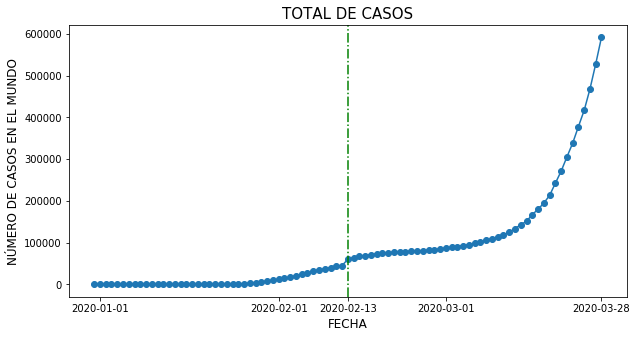

In [11]:
plt.figure(figsize=(10,5))
plt.plot(cases_world['date'], cases_world['World'], marker='o')
plt.axvline(x='2020-02-13', color='g', ls='-.') 

plt.xticks(['2020-01-01', '2020-02-01', '2020-02-13', '2020-03-01', cases_world['date'][len(total_cases)-1]])
plt.xlabel('FECHA', size=12)
plt.ylabel('NÚMERO DE CASOS EN EL MUNDO', size=12)
plt.title('TOTAL DE CASOS', size=15);

### Aquí se presenta el top de los 20 países con mayor número de afectados.

In [12]:
top_countries[0:20]

United States     104686.0
Italy              86498.0
China              82213.0
Spain              64059.0
Germany            48582.0
France             32964.0
Iran               32332.0
United Kingdom     14543.0
Switzerland        12104.0
South Korea         9478.0
Netherlands         8603.0
Austria             7697.0
Belgium             7284.0
Turkey              5698.0
Canada              4689.0
Portugal            4268.0
Norway              3581.0
Brazil              3417.0
Australia           3378.0
Sweden              3046.0
Name: max, dtype: float64

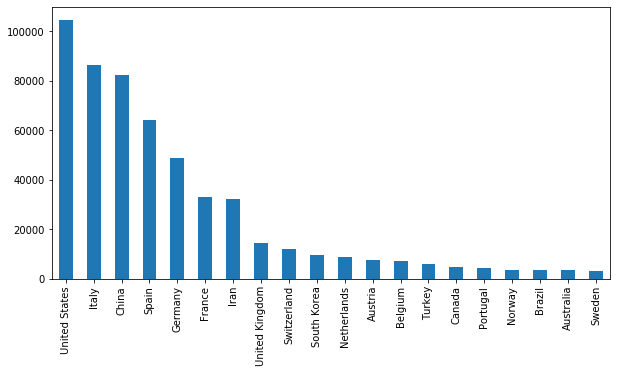

In [13]:
plt.figure(figsize=(10,5))
top_countries[0:20].plot(kind="bar");

In [54]:
#HGráfico del país número "a" hasta el país número "b" de la lista del top de países más infectados.

def grafica_top_countries(a,b,dias):
    
    plt.figure(figsize=(15,8))
    
    for i in range(a-1,b):
        pais = top_countries.index[i]
        plt.plot(total_cases['date'][dias:], total_cases[pais][dias:], marker='o', label=pais)
    

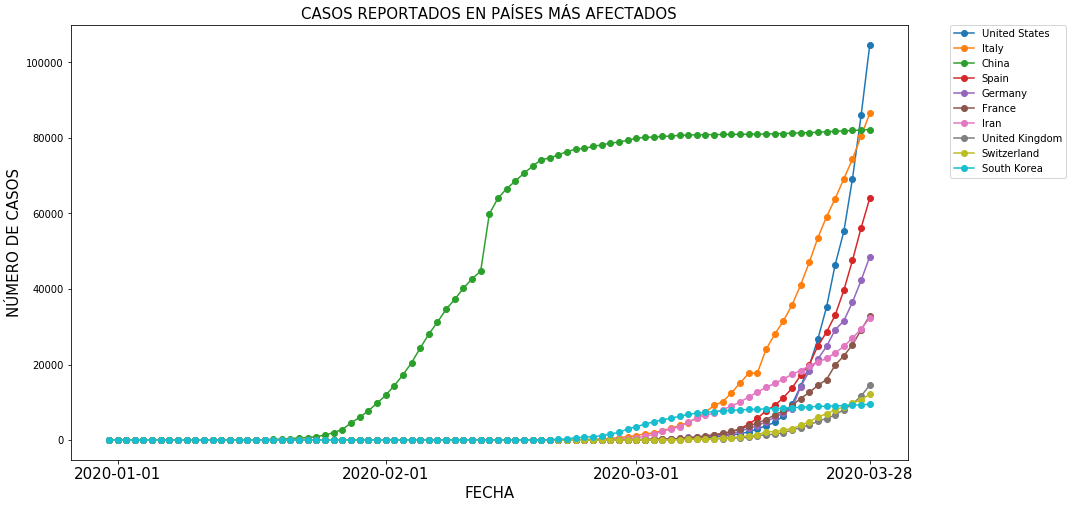

In [55]:
grafica_top_countries(1,10,0)  

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Etiquietas
    
plt.xticks(['2020-01-01', '2020-02-01', '2020-03-01', total_cases['date'][len(total_cases)-1]], size=15)
plt.xlabel('FECHA', size=15)
plt.ylabel('NÚMERO DE CASOS', size=15)
plt.title('CASOS REPORTADOS EN PAÍSES MÁS AFECTADOS', size=15);

______________________________________________________

# México
    

.

In [17]:
## Mostrará los últimos 30 días 

def mexico_last_days():

    dias = len(total_cases) - 30  

    plt.figure(figsize=(15,10))

    grafica_top_countries(1,10,dias)
    plt.plot(total_cases['date'][dias:], total_cases['Mexico'][dias:], marker='o', label="México")
    #plt.plot(total_cases['date'][dias:], total_cases['Canada'][dias:], marker='o', label="Canadá")
    #plt.plot(total_cases['date'][dias:], total_cases['United States'][dias:], marker='o', label="Estados Unidos")
    #plt.plot(total_cases['date'][dias:], total_cases['Italy'][dias:], marker='o', label="Italia")
    #plt.plot(total_cases['date'][dias:], total_cases['China'][dias:], marker='o', label="China")
    #plt.plot(total_cases['date'][dias:], total_cases['Spain'][dias:], marker='o', label="España")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Etiquietas

    #plt.xticks(['2020-01-01', '2020-02-01', '2020-03-01', total_cases['date'][len(total_cases)-1]])
    plt.xticks(['2020-03-01', total_cases['date'][len(total_cases)-1]], size=15)
    plt.xlabel('FECHA', size=15)
    plt.ylabel('NÚMERO DE CASOS', size=15)
    plt.title('CASOS MÉXICO VS OTROS PAÍSES (ÚLTIMOS 30 DÍAS)', size=15);

In [18]:
## Aproximación de la froma  y = a*b^x

def ajuste(punto1, punto2):
    
    b = (punto2[1] / punto1[1])**(1/(punto2[0]-punto1[0]))
    a = punto2[1] / b**punto2[0]
    
    return a, b

Fecha: 2020-03-28 21:13:09.339476

El número total de casos en Mexico es de 717.0 infectados.

El último incremento es de 132.0 nuevos casos.

El incremento máximo fue de  132.0 infecciones

Con un número de muertos de 12.0 personas (el 1.67 % de su población infectada).

Mexico abarca el 0.12 % del total de casos confirmados a nivel mundial.


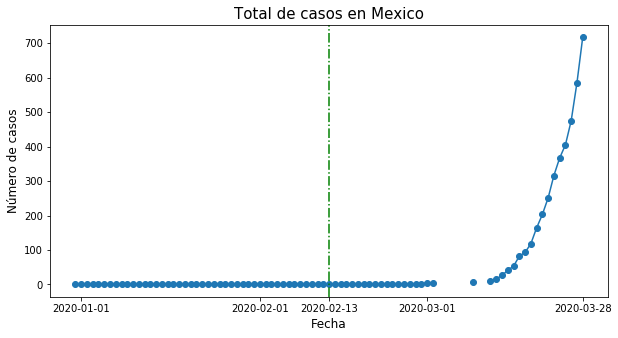

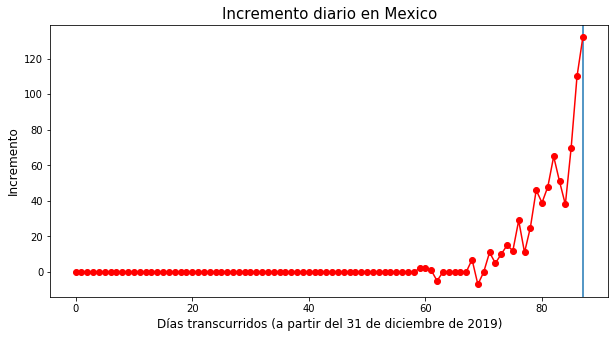

In [44]:
estadisticos('Mexico')

<Figure size 1080x720 with 0 Axes>

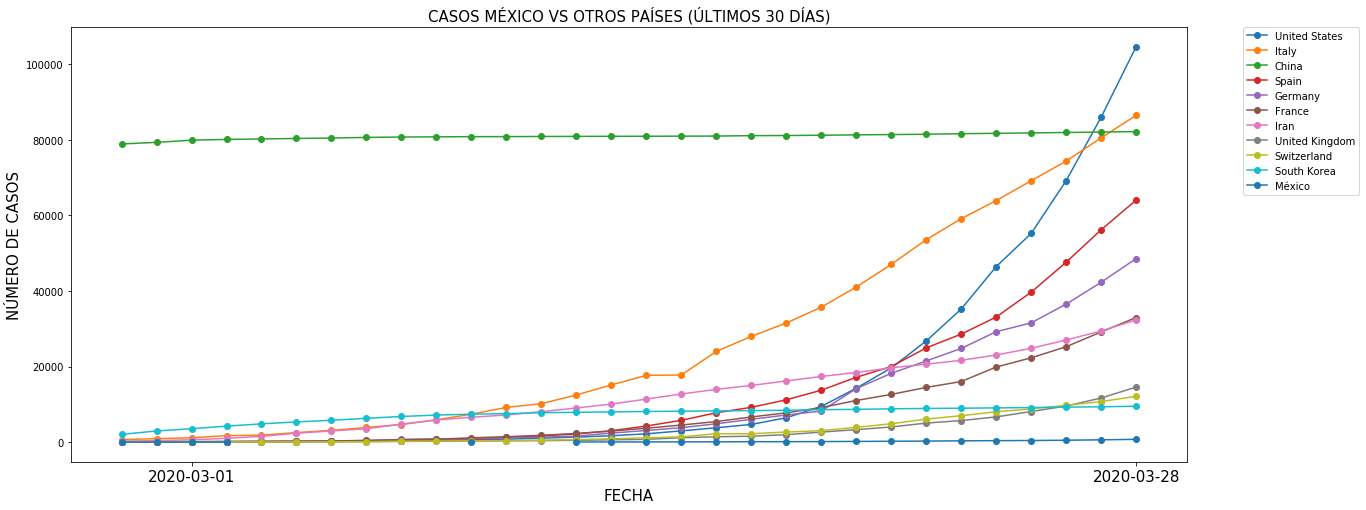

In [50]:
mexico_last_days()

<font size=4>

Aún no entramos en una etapa tan alarmante como en otros países. <b>México se encuentra en el lugar 45 de países afectados</b>, pero debemos actuar de manera responsable para no comenzar con un crecimiento tan elevado. Comparando los gráficos, podemos hacer una estimación sobre el comportamiento que podría llegar a tener México en los siguientes días si no se toman las medidas necesarias. Veremos ahora la tasa de crecimiento.

## Ajuste

In [26]:
# Parámetros
punto1 = [0,5]
punto2 = [15,132]

a, b = ajuste(punto1, punto2)
print("a=", a, "  ", "b=", b, "\n")

a= 5.000000000000005    b= 1.2438659948630757 



In [22]:
#Gráfica de la exponencial encontrada
prediccion = []
dominio = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for x in dominio:
    y = a*(b**x)
    prediccion.append(y)
    
#plt.figure(figsize=(8,5))
#plt.plot(dominio, prediccion);

/home/octavio/anaconda3/envs/IA_IF/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/octavio/anaconda3/envs/IA_IF/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


[5.0, 10.0, 15.0, 12.0, 29.0, 11.0, 25.0, 46.0, 39.0, 48.0, 65.0, 51.0, 38.0, 70.0, 110.0, 132.0]



Tasa de crecimiento promedio:  1.3073332291175717


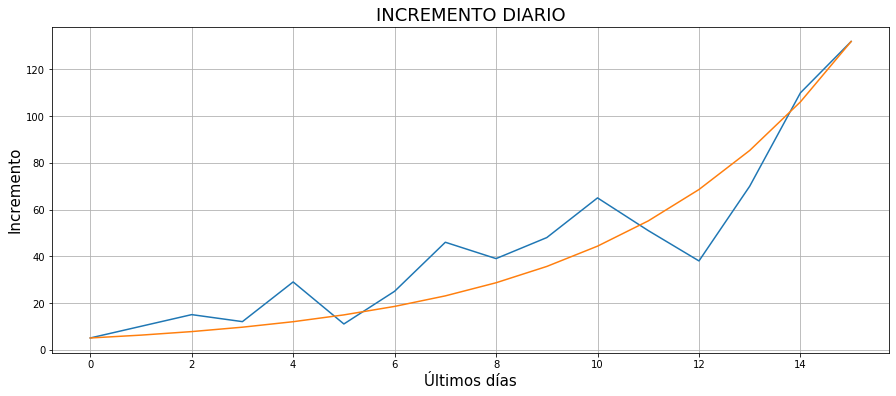

In [52]:
# Razón de crecimiento

# Calcula los incrementos diarios
incremento = []
for n in range(1,len(total_cases['Mexico'])):
    diferencia = total_cases['Mexico'][n] - total_cases['Mexico'][n-1]
    incremento.append(diferencia)

tasa = []  # Tasa de crecimiento
for n in range(1,len(total_cases['Mexico'])):
    cociente = total_cases['Mexico'][n] / total_cases['Mexico'][n-1]
    tasa.append(cociente)


    
#"""

puntos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
predic = []

for x in puntos:
    predic.append(a*(b**x))

plt.figure(figsize=(15,6))
plt.plot(puntos, incremento[72:])
plt.plot(puntos, predic)
plt.grid()

plt.xlabel("Últimos días", size=15)
plt.ylabel("Incremento", size=15)
plt.title("INCREMENTO DIARIO", size=18)
#"""

def promedio(arr):
    suma = 0
    for i in arr:
        suma += i
    promedio = float(suma/len(arr))
    return promedio

print(incremento[72:])
print("\n")
#print(tasa[72:])

print("\nTasa de crecimiento promedio: ", promedio(tasa[72:]))


### Hasta ahora, la función que parece modelar el crecimiento está dada por

$$ y=8.32(1.20)^{x} $$

### Suponiendo que la tasa de crecimiento se mantiene, el pronóstico para los siguientes días son:

In [48]:
estimacion = []
for i in range(16,30):
    estimacion.append(int(a*b**i))
estimacion

[164, 204, 254, 315, 393, 488, 608, 756, 940, 1170, 1455, 1810, 2252, 2801]

| Estimación | Nuevos casos | Casos acumulados |
| --- | --- | --- |
| 27 marzo | - | 717 |
| 28 marzo | 164 | 881 |
| 29 marzo | 204 | 1,085 |
| 30 marzo | 254 | 1,339 |
| 31 marzo | 315 | 1,654 |
| 01 abril | 393 | 2,047 |
| 02 abril | 488 | 2,535 |
| 03 abril | 608 | 3,143 |
| 04 abril | 756 | 3,899 |
| 05 abril | 940 | 4,839 |

(En las gráficas aparecen los datos correspondientes a los registros actualizados con un día de retraso, por lo cual los 717 casos visualizados del 28 de marzo pertenecen al del 27 de marzo )

.

### Según los datos oficiales del gobierno de México, el registro de confirmados por COVID-19 es de 848 casos hasta hoy (28 de marzo). El pronóstico que aquí se obtuvo está por encima de ese valor, pero considerando el número de casos que no se registraron podemos decir que es una muy buena aproximación. Hemos de esperar los siguientes días para confirmar este modelo, pero es muy probable que encontremos bastante similitud con lo estimado. 

### Se ha hecho énfasis en la necesidad de quedarse en casa por el riesgo de encontrarnos en una situación como la de Italia, Estados Unidos o España. Aquí se presentaron las cifras esperadas y se nota un gran avance de contagio dentro de poco. Por eso es de suma importancia actuar a conciencia.